# Topping the Best Sellers: Trends to Watch for in the New York Times Bestsellers
# Written and Coded by: Katrina Jaeger

You walk into a bookstore. The nearby display advertises the newest novel from a New York Times Bestselling Author. Maybe a  television set in the bookshop's cafe shows a new anchor discussing the rise of YA paranormal novels. Even the book you end up buying proudly brandishes "New York Times Best Seller!"

Books are all around us. They both unite us in a shared culture, like the launch of the last Harry Potter book, or allow us to escape our world. Understanding what books people buy can not only help aspiring young authors, but also help us understand the overall trends in our society.

In this tutorial I'll be looking at data collected from the New York Times Bestsellers list from 2008 to 2018. We'll look at how different subgenres, prices, and combinations of the two fare on the list.

If you would like to have a look at the datasets I used both can be found on Kaggle and here are links to them:

https://www.kaggle.com/cmenca/new-york-times-hardcover-fiction-best-sellers

https://www.kaggle.com/zygmunt/goodbooks-10k

First thing first though! We have to read in and clean up our data before we can start working on it.

# Section 1: Data Introduction and Reading

I'll be using two different datasets for this analysis. One was scrapped from the NYT API and the other was scrapped from Goodreads API. You may be asking... if we're looking at the NYTBSL why are we taking data from Goodreads, a book review site? One of the aspects I want to look at is the subgenres of each book. Is it a fantasy, sci-fi, romance, etc. Unfortunately, NTY does not keep track of that sort of thing, so we'll have to get that data from somewhere else. That's where Goodreads comes to the rescue. 

Goodreads is not a perfect solution though, because they don't keep track of the genres directly. Instead users can tag different books with different tags by sorting them in their virtual libraries. Essentially, if a lot of users put a book into their fanasty shelve it gets tagged as a fantasy book. Tag are not restricted to just genres though, they can be settings, authors, series or reading status ("currently_reading" ,"want_to_buy" ,etc). Good news is that means that the tag system is more detailed that just fiction/nonfiction or sci-fi/fantasy. Bad news is that means that we could potentially have a lot of subgenre categories.

Some of that is helped by the fact that we won't be using all the data from both lists. Instead we'll only use the data that is found in both lists. Yes, that means that some data will be lost in the merge, but the data that survives will be more informative. That brings up another problem... how will we match up the data from the two datasets? There is a handy little number called the ISBN (International Standard Book Number) which is basically an id number that all of these books have. Both Goodreads and NYT keeps track of those ids UNFORTUNELY, the dataset from NYT that I'm using does not if fact kept track of the ISBN. So instead I'll use the title and authors which will be far more messy (but I'll go into that later.)

In [1]:
#pandas helps with reading in the data
import pandas as pd
#first I'll read in the data from the Goodreads dataset.
#From that set I'll be using: Books, Book_Tags, and Tags
books_main = pd.read_csv("books.csv")
#show only the first few enties
books_main.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [2]:
#next up is book_tags
book_tags = pd.read_csv("book_tags.csv")
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [3]:
#next is the tag names
#there are 34252 tags!
tag_names = pd.read_csv("tags.csv")
tag_names.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [4]:
#and now for the NYT data
nyt_best = pd.read_json("nyt2.json",lines=True)
nyt_best.head()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,{'$date': {'$numberLong': '1211587200000'}},"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},{'$date': {'$numberLong': '1212883200000'}},Bantam,{'$numberInt': '1'},{'$numberInt': '0'},ODD HOURS,{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,{'$date': {'$numberLong': '1211587200000'}},Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",{'$numberInt': '2'},{'$numberInt': '1'},THE HOST,{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,{'$date': {'$numberLong': '1211587200000'}},A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},St. Martin's,{'$numberInt': '3'},{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,{'$date': {'$numberLong': '1211587200000'}},A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},{'$date': {'$numberLong': '1212883200000'}},Putnam,{'$numberInt': '4'},{'$numberInt': '0'},THE FRONT,{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,{'$date': {'$numberLong': '1211587200000'}},An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},{'$date': {'$numberLong': '1212883200000'}},Doubleday,{'$numberInt': '5'},{'$numberInt': '0'},SNUFF,{'$numberInt': '1'}


# Section 2: Cleaning Up Our Data

So now we have our data. ...but it's really messy and hard to read at some places. Not to mention it has a lot of extra data that won't be used. Also, as I mentioned before we'll only use data that is in both datasets.

First I'll clean up the NYT data by pulling out the data (like getting 25.99 {'$numberDouble': '25.99'}). I won't bother extracting data from columns I won't use. Speaking of those columns, they'll be dropped, but not explicitly, which I'll get to in the next step. Each of the entries in the dataset is for each book for each week it was on the NYTBSL. For example, if Harry Potter was on the list for 20 weeks then there would be 20 entries for it in the dataset.

For price I took the average price of all of the weeks that book was on the NYTBSL

# Cleaning and Merging the Datasets

In [5]:
#since the nyt dataset is ugly right now let's fix it
nyt_books = pd.DataFrame(nyt_best)
from datetime import datetime
def get_num(x):
    #for prices that are XX.99 I'll round them up
    if '$numberDouble' in x:
        ret_num = int(float(x['$numberDouble'])+0.01)
    elif '$date' in x:
        #divide the timestamp from the dataset since it's in miliseconds when datetime wants seconds
        ret_num = datetime.fromtimestamp(int(x['$date']['$numberLong'])/1000)
    else:
        ret_num = int(x['$numberInt'])
    return ret_num
nyt_books['rank'] = nyt_books['rank'].apply(get_num)
nyt_books['price'] = nyt_books['price'].apply(get_num)
nyt_books['weeks_on_list'] = nyt_books['weeks_on_list'].apply(get_num)
nyt_books['bestsellers_date'] = nyt_books['bestsellers_date'].apply(get_num)
nyt_books.head()

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,2008-05-23 20:00:00,"Odd Thomas, who can communicate with the dead,...",27,{'$date': {'$numberLong': '1212883200000'}},Bantam,1,{'$numberInt': '0'},ODD HOURS,1
1,{'$oid': '5b4aa4ead3089013507db18c'},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,2008-05-23 20:00:00,Aliens have taken control of the minds and bod...,26,{'$date': {'$numberLong': '1212883200000'}},"Little, Brown",2,{'$numberInt': '1'},THE HOST,3
2,{'$oid': '5b4aa4ead3089013507db18d'},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,2008-05-23 20:00:00,A woman's happy marriage is shaken when she en...,24,{'$date': {'$numberLong': '1212883200000'}},St. Martin's,3,{'$numberInt': '2'},LOVE THE ONE YOU'RE WITH,2
3,{'$oid': '5b4aa4ead3089013507db18e'},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,2008-05-23 20:00:00,A Massachusetts state investigator and his tea...,22,{'$date': {'$numberLong': '1212883200000'}},Putnam,4,{'$numberInt': '0'},THE FRONT,1
4,{'$oid': '5b4aa4ead3089013507db18f'},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,2008-05-23 20:00:00,An aging porn queens aims to cap her career by...,24,{'$date': {'$numberLong': '1212883200000'}},Doubleday,5,{'$numberInt': '0'},SNUFF,1


So I'll combine the entries that are about the same book. That brings yet another question... how will I combine them? For title and author it's simple since they'd be the same (since, again they're the same book). The Rank and Price are the two columns I'm most interested in and they're some interesting when I combined the week entries. For rank I combined the ranks up into a "Bestseller_Score" (BSS). I gave each rank a point value that was equal to 21-rank (so if a book was rank 1 that earned it 20 points and a rank of 20 got 1 point.)

In [6]:
#Beautiful! Now let's combine each book's data into one entry per book/author combination!
author_list = list()
best_start_list = list()
best_end_list = list()
desc_list = list()
avg_price_list = list()
score_list = list()
weeks_list = list()
title_list = list()
#go through the books by title
for title_group in nyt_books.groupby("title"):
    #print(title_group[1]['title'])
    #some authors have books with the same name so go through those authors
    for author_group in title_group[1].groupby('author'):
        #save the data that stays the same
        author_list.append(author_group[1]['author'].unique()[0])
        desc_list.append(author_group[1]['description'].unique()[0])
        title_list.append(author_group[1]['title'].unique()[0])
        #take the smallest date as the bestsellers start...
        best_start_list.append(min(author_group[1]['bestsellers_date']))
        #...and the max as the end
        best_end_list.append(max(author_group[1]['bestsellers_date']))
        #take the max val of weeks on list as the total weeks on the list
        #+1 to could the week that the max is from (ex: a book that was on the list would have a weeks on of 0)
        weeks_list.append(max(author_group[1]['weeks_on_list'])+1)
        #take the average price 
        avg_price_list.append(sum(author_group[1]['price'])/len(author_group[1]['price']))
        #now go through all of the entries and give them points based on their rank
        #the point are 21-x so that a book at rank 1 gets 20 points, and one at 20 gets 1 point.
        book_score = 0
        for book_entry in author_group[1].iterrows():
            book_score = book_score + (21-book_entry[1]['rank'])
        score_list.append(book_score)
        book_score = 0
#now that er have our combined values let's put them in a dataframe
best_book = pd.DataFrame({'Title':title_list,'Author':author_list, 'Bestseller_Score':score_list,'Average_Price':avg_price_list,'Weeks_on_List':weeks_list,'Bestseller_Start':best_start_list,'Bestseller_End':best_end_list, 'Description':desc_list})
print(len(best_book['Author']))
best_book.head()

2328


,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...
3,1225 CHRISTMAS TREE LANE,Debbie Macomber,58,9.142857,5,2011-09-30 20:00:00,2011-11-11 19:00:00,Puppies and an ex-husband loom large in the la...
4,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv..."


Next comes the hard part: Merging the two datasets. The first I'll merge on the title since there isn't much they could change about a title. The main difference is that the NYT dataset stores it's titles in all cases, so I'll converted the GR titles to all caps to compare and merge them. I'll drop a lot of columns from the GR dataset that I don't need (like ratings or images of the cover of the book).

In [7]:
books_main['test_title']=books_main['original_title'].str.upper()
title_match = best_book.merge(books_main,how="inner",left_on="Title",right_on="test_title")
title_match = title_match.drop(columns=["ratings_1","ratings_2","ratings_3","ratings_4","ratings_5","image_url","small_image_url","work_text_reviews_count","average_rating","ratings_count","work_ratings_count","original_publication_year"])
title_match.head()

,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_title,title,language_code,test_title
0,10TH ANNIVERSARY,James Patterson and Maxine Paetro,131,22.400000,9,2011-05-06 20:00:00,2011-07-08 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,3801,9436746,9436746,14321334,45,316036269,9.780316e+12,"James Patterson, Maxine Paetro",10th Anniversary,"10th Anniversary (Women's Murder Club, #10)",eng,10TH ANNIVERSARY
1,11/22/63,Stephen King,321,31.956522,22,2011-11-11 19:00:00,2012-04-27 20:00:00,An English teacher travels back to 1958 by way...,295,10644930,10644930,15553789,145,1451627289,9.781452e+12,Stephen King,11/22/63,11/22/63,eng,11/22/63
2,11TH HOUR,James Patterson and Maxine Paetro,123,22.400000,9,2012-05-11 20:00:00,2012-07-13 20:00:00,Detective Lindsay Boxer and the Womenâ€™s Murd...,4048,11872242,11872242,16829865,47,1846057914,9.781846e+12,"James Patterson, Maxine Paetro",11th hour,"11th Hour (Women's Murder Club, #11)",eng,11TH HOUR
3,12TH OF NEVER,James Patterson and Maxine Paetro,94,0.000000,7,2013-05-03 20:00:00,2013-06-14 20:00:00,"One week after the birth of her baby, Detectiv...",4377,15734464,15734464,21416605,41,NaN,NaN,"James Patterson, Maxine Paetro",12th of Never,"12th of Never (Women's Murder Club, #12)",en-US,12TH OF NEVER
4,14TH DEADLY SIN,James Patterson and Maxine Paetro,98,0.000000,8,2015-05-08 20:00:00,2015-06-26 20:00:00,"A video of a shocking crime surfaces, casting ...",5164,23346918,23346918,42742312,42,1780892888,9.781781e+12,"James Patterson, Maxine Paetro",14th Deadly Sin,"14th Deadly Sin (Women’s Murder Club, #14)",eng,14TH DEADLY SIN


Now here comes the harder and more complicated part of matching the datasets: the authors. You would think that it would be as simple as matching the titles since each book only has one author right? WRONG! While each book may have been written by the same person or people, they are not always listed the same. 

For example, in the NYT dataset the author might be listed as "John Smith" while GR says the book was written by "John Smith,Jane Doe". Not only that the two datasets list pairs of authors differently. NYT would have "John Smith and Jane Doe" while GR would say "John Smith,Jane Doe". Even when the authors are the same, in some of the cases they were listed in reverse order. 

The differences aren't limited to just pairs of authors. NYT might list "John A Smith" while GR has "John Smith". There were also cases where the titles matched, but the authors were different. So how do I pull out the books with different authors from the authors that are the same, but listed differently?

To start, I cut the author strings into words by splitting on spaces. I replaced "and" and "," with spaces and flipped a flag that said there was a pair of authors for the NYT and GB datasets respectively. I also replaced "." in the GR dataset since it was used in between initials. There was also a case for "With", which was occasionally  used instead of "and" and tried it the same. The exception was in one case where there was both an "and" and a "with". For that case, since it was just one book I just made a special case for it.

Now that we have the authors split up into words how will we compare them? There are 3 (technically 4 case, but two of them are mostly the same). They are: both authors are a pair, one author is a pair and the other is not, and both authors are not pairs. The last one is the simplest so I'll start by explaining that one. 

If the list of words were the same length I just compared them directly, and if one was longer than the other I compared the first word of the longer author with the first word of the shorter author and the last word of the longer author with the last word of the shorter author (basically ignoring the middle words which were most likely initials).

When one of the authors was a pair and the other was not I did something similar. Instead of simply comparing the first and last of the authors, I compared the first and last of the single against both of the pairs. So for example if I had author A as the single and author B and C as the pair then I compared A to B and A to C. If one of those was a match I said the whole thing was a match.

Finally when they were both a pair then i again did something similar. If they were the same length I compared the authors directly. If they were the same then I said they were a match, if not then it continued to the next comparison. If one was longer than the other, or they had the same length but didn't match, I compared them similarly to the second case. For example if I had author A and B and authors C and D then I check if A = C and B = D or A = D and B = C (since there were a few cases where the names were reversed).

Finally there was a special case for George R R Martin since his double initials threw off the way I ignored the initials.

In [8]:
test_list = list()
nyt_pair = False
gr_pair = False
gr_inital = False
check = False
sweater = False
for test_row in title_match.iterrows():
    if test_row[1]['Author'] == test_row[1]['authors']:
        test_list.append(True)
    else:
        #if test_row[1]['test_title'] == "A KNIGHT OF THE SEVEN KINGDOMS":
            #check = True
        #save this row's authors as strings
        nyt_author = test_row[1]['Author'].upper()
        gr_author = test_row[1]['authors'].upper()
        #replacev separators with ' ' (and check of there are two authors)
        if "AND" in nyt_author:
            nyt_author = nyt_author.replace(" AND "," ")
            nyt_pair = True
        if "WITH" in nyt_author:
            #the Christmas Sweater is the only case with both and and with and it matches so just say it's good
            if nyt_pair == True:
                test_list.append(True)
                sweater = True
            nyt_author = nyt_author.replace(" WITH "," ")
            nyt_pair = True
        if not sweater:
            if "," in gr_author:
                gr_author = gr_author.replace(", "," ")
                gr_pair = True
            if "." in gr_author:
                gr_author = gr_author.replace("."," ")
                gr_intial = True
            nyt_words = nyt_author.split()
            gr_words = gr_author.split()
            #saving lengths since I'll use them a few times
            nyt_len = len(nyt_words)
            gr_len = len(gr_words)
            #if they both have two names then compare the two names
            if nyt_pair == True and gr_pair == True:
                if nyt_len == gr_len:
                    #if the author names have the same number of words compare the whole list
                    if nyt_words == gr_words:
                        test_list.append(True)
                    else:
                        #before tossing it out check if they're the same but reverse
                        if nyt_len % 2 == 0:
                            nyt_mid = int((nyt_len/2)-1)
                        else:
                            nyt_mid = int((nyt_len/2)-0.5)
            
                        if gr_len % 2 == 0:
                            gr_mid = int((gr_len/2)-1)
                        else:
                            gr_mid = int((gr_len/2)-0.5)
                        
                        if (((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_mid]==nyt_words[nyt_len-1])) 
                        and ((gr_words[gr_mid+1]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid]))):
                            test_list.append(True)
                        else:
                            test_list.append(False)
                #if they don't then compare the authors to see if they're the same (or in reverse order)
                else:
                    if nyt_len % 2 == 0:
                        nyt_mid = int((nyt_len/2)-1)
                    else:
                        nyt_mid = int((nyt_len/2)-0.5)
            
                    if gr_len % 2 == 0:
                        gr_mid = int((gr_len/2)-1)
                    else:
                        gr_mid = int((gr_len/2)-0.5)
                    #checks if (nyt_A = gr_A and nyt_B = gr_B) or (nyt_A = gr_B and nyt_B = gr_A) 
                    if ((((gr_words[0]==nyt_words[0]) and (gr_words[gr_mid]==nyt_words[nyt_mid]))
                    and ((gr_words[gr_mid+1]==nyt_words[nyt_mid+1]) and (gr_words[gr_len-1]==nyt_words[nyt_len-1])))
                    or (((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_mid]==nyt_words[nyt_len-1])) 
                    and ((gr_words[gr_mid+1]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid])))):
                        test_list.append(True)
                    else:
                        test_list.append(False)
            #if only the nyt has a pair (and gr only has one author) compare gr's author to the 2 nyt authors
            elif nyt_pair == True:
                if nyt_len % 2 == 0:
                    nyt_mid = int((nyt_len/2)-1)
                else:
                    nyt_mid = int((nyt_len/2)-0.5)
        
                if (((gr_words[0]==nyt_words[0]) and (gr_words[gr_len-1]==nyt_words[nyt_mid]))
                or ((gr_words[0]==nyt_words[nyt_mid+1]) and (gr_words[gr_len-1]==nyt_words[nyt_len-1]))):
                    test_list.append(True)
                else:
                    test_list.append(False)
            #vice versa for gr
            elif gr_pair == True:
                #George R R Martin breaks the rules in one case so just say that case is good
                #There is also a weird case with 3 gr authors so do the same with that
                if ((nyt_len == 4 and nyt_words[0]=="GEORGE" and nyt_words[3]=="MARTIN" and gr_len == 6 and gr_words[4] == "GARY")
                or (gr_len == 6 and nyt_words[0]=="VINCE" and nyt_words[1]=="FLYNN")) :
                    test_list.append(True)
                else:
                    if gr_len % 2 == 0:
                        gr_mid = int((gr_len/2)-1)
                    else:
                        gr_mid = int((gr_len/2)-0.5)
                    if check:
                        print(gr_words[gr_mid])
        
                    if (((nyt_words[0]==gr_words[0]) and (nyt_words[nyt_len-1]==gr_words[gr_mid] or nyt_words[nyt_len-1]==gr_words[gr_mid-1])) 
                    or ((nyt_words[0]==gr_words[gr_mid+1]) and (nyt_words[nyt_len-1]==gr_words[gr_len-1]))):
                        test_list.append(True)
                    else:
                        test_list.append(False)
        
            else:
                #if the author names have the same number of words compare the whole list
                if nyt_len == gr_len:
                    if nyt_words == gr_words:
                        test_list.append(True)
                    else:
                        test_list.append(False)
                 #if they're different lengths compare the first and last names (use len to skip middle inital)
                else:
                    if (nyt_words[0]==gr_words[0]) and (nyt_words[nyt_len-1]==gr_words[gr_len-1]):
                        test_list.append(True)
                    else:
                        test_list.append(False)
    nyt_pair= False
    gr_pair = False
    sweater = False

In [9]:
#now that we have the authors all matched up let's drop the authors that don't match!
title_match["author_match"]=test_list
author_match_df = title_match[title_match["author_match"]==True]
#since our authors now match we can drop one of those columns and some of the other columns
author_match_df = author_match_df.drop(columns=["authors","test_title","title","original_title","best_book_id","work_id","id","author_match","isbn13","language_code","isbn","books_count"])
author_match_df = author_match_df.rename(columns={"book_id":"goodread_book_id"})
#here are the entries orgainized by the BSS
author_match_df.sort_values('Bestseller_Score',ascending=False).head()

,Title,Author,Bestseller_Score,Average_Price,Weeks_on_List,Bestseller_Start,Bestseller_End,Description,goodread_book_id
654,THE HELP,Kathryn Stockett,1582,22.736842,109,2009-03-13 20:00:00,2011-09-09 20:00:00,A young white woman and two black maids collab...,4667024
639,THE GIRL ON THE TRAIN,Paula Hawkins,1313,0.000000,80,2015-01-16 19:00:00,2016-07-22 20:00:00,A psychological thriller set in London is full...,22557272
253,GONE GIRL,Gillian Flynn,1243,13.218391,81,2012-06-08 20:00:00,2014-04-18 20:00:00,A woman disappears on the day of her fifth ann...,8442457
723,THE NIGHTINGALE,Kristin Hannah,981,0.000000,83,2015-02-06 19:00:00,2016-12-16 19:00:00,Two sisters in World War II France: one strugg...,21853621
10,A DANCE WITH DRAGONS,George R R Martin,956,22.783019,87,2011-07-15 20:00:00,2013-09-06 20:00:00,"After a colossal battle, the Seven Kingdoms fa...",10664113


So now we have all of the books that were found in both sets, but we aren't done yet. We still need to define genres and sort the books into them.

# Turning Tags into Genres

As I mentioned earlier, there are a lot of tags in the GR tags. Over 34000 in fact and most of them are not of use to defining genres. In the next block of code I cleaned up the tag id and the tag name dataframes by merging them and removing the middle man that was tag ID. I used the GR ID to identify books and brought along the title and author to help me tell books apart when looking at the data.

The lines and lines of dropping tags are tags that were popular enough in the data that they covered up more informative tags. Some of them are more obvious like anything that contains a year. The first batch are tags that all contain some base word, like series that knocked out various tags that told you what book series the book was a part of. The second batch are tags that I had to get rid of one tag in particular, either because there was only one of that tag or there other tags with the same base word that were informative (like getting rid of just "ya" but keeping "ya-fantasy".) The final batch is a loop that marks tags that contain the first authors name to get rid of the many, many, author tags. (A small side note: this did lead to any books by J K Rowling dropping any tags that contained "j", but after looking at the tags nothing of importance was lost.)

In [10]:
tag_merge_df = pd.DataFrame({'GoodRead_ID':author_match_df['goodread_book_id'],'Title':author_match_df['Title'],'Author':author_match_df['Author']})
best_seller_tags = tag_merge_df.merge(book_tags,how="inner",left_on="GoodRead_ID",right_on="goodreads_book_id")
#we can drop the extra id column
best_seller_tags = best_seller_tags.drop(columns=["goodreads_book_id"])
#now let's bring in the tag names
best_seller_tags = best_seller_tags.merge(tag_names,how="inner",left_on="tag_id",right_on="tag_id")
#since there are a LOT of tags that aren't genres I'm going to go through all of the entries and catagorize them.
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("read")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("book")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("series")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("own")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("kindle")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("library")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("finish")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("alex")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("1001")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("audio")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("default")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("buy")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("audible")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("reacher")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("sigma")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("stephanie")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("gave")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("general")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("short")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("animal")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("inspirational")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("retelling")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("preston")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("southern")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("bennett")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("clancy")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("food")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("pulitzer")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("recommend")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("canad")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2017")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2016")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("2018")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("author")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("interest")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("rowling")==False)]

#drop "favorites" + variations
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("favorite")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name'].str.contains("favourite")==False)]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="Ｆａｖｏｒｉｔｅｓ")]
#drop "fiction" (we're in a fiction list)
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dfw")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dnf")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="novel")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="novels")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="non-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="abandoned")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="contemporary")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="contemporary-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literary-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literary")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="literature")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="patterson")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="wish-list")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="palahniuk")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="borrowed")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="adult-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="adult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="have")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="nope")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="bonobos")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dogs")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="oprah")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="picoult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="dekker")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="christian-fiction")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="stories")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="grisham")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="netgalley")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="ya")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="young-adult")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="jack-ryan")]
best_seller_tags = best_seller_tags[(best_seller_tags['tag_name']!="other")]

#make a temp column to test if the tag is the author's name 
#(using first name to catch cases like "stephen-king")
def contains_first_name(x):
    author_name = x['Author'].lower().split()[0]
    if author_name in x['tag_name']:
        return True
    else: 
        return False
best_seller_tags['author_first_name'] = best_seller_tags.apply(contains_first_name, axis=1)
best_seller_tags = best_seller_tags[(best_seller_tags['author_first_name']==False)]
best_seller_tags = best_seller_tags.drop(columns="author_first_name")
print(len(best_seller_tags['tag_name']))
best_seller_tags.head()

28805


,GoodRead_ID,Title,Author,tag_id,count,tag_name
1540,9436746,10TH ANNIVERSARY,James Patterson and Maxine Paetro,20939,424,mystery
1541,10644930,11/22/63,Stephen King,20939,375,mystery
1542,11872242,11TH HOUR,James Patterson and Maxine Paetro,20939,371,mystery
1543,15734464,12TH OF NEVER,James Patterson and Maxine Paetro,20939,298,mystery
1544,23346918,14TH DEADLY SIN,James Patterson and Maxine Paetro,20939,215,mystery


Now to organize the books into genres. To do this first I selected my genres. The genres I will be using are: Mystery, Thriller, Realistic, Romance, Fantasy, Science Fiction, and Other. Other isn't an "official" genre, it was used more to look at cases where the unsorted tags outweighed the sorted ones and decide if I need to drop or sort a tag. I mentally divided the genres into two categories: setting/plot genres and mood/tone/plot genres. None of the genres are mutually exclusive, but I felt that these 8 genres covered most books. (In fact there was only one book that I couldn't sort.) 

I determined points by used the tag counts, figuring that 1000 tagging a book as fantasy said more than 100 tagging it mystery. I also only went through the top 5 tags for each book since the rest rarely outweighed them. For subgenres (like paranormal) I counted them towards their main genre. For dual genre tags (like mystery-romance) I gave those points to both main genres. Whichever genre had the most points for each book was that book's primary genre, and 2nd place was it's secondary.

In [11]:
#lists to build the new dataframe
gr_id_tag_list = list()
author_tag_list = list()
title_tag_list = list()
mystery_list = list()
thiller_list = list()
history_list = list()
romance_list = list()
scifi_list = list()
fantasy_list = list()
other_list = list()
comedy_list = list()
drama_list = list()
primary_list = list()
second_list = list()
#sort the df by count
best_seller_tags = best_seller_tags.sort_values('count',ascending=False)
#go through each book by using it's ID
for curr_title in best_seller_tags.groupby('GoodRead_ID'):
    #save the id
    gr_id_tag_list.append(curr_title[0])
    #save the author
    author_tag_list.append(curr_title[1]['Author'].unique()[0])
    #save the title
    title_tag_list.append(curr_title[1]['Title'].unique()[0])
    #take the first 5 tags (which will be the tags with the highest counts)
    tag_head = curr_title[1].head()
    mys_score = 0
    thill_score = 0
    hist_score = 0
    rom_score = 0
    scifi_score = 0
    fan_score = 0
    com_score = 0
    drama_score = 0
    other_score = 0
    for curr_row in tag_head.iterrows():
        curr_tag = curr_row[1]['tag_name']
        curr_count = curr_row[1]['count']
        counted = False
        if "myster" in curr_tag or "crime" in curr_tag or "espionage" in curr_tag or "spy" in curr_tag or "detective" in curr_tag or "murder" in curr_tag:
            mys_score = mys_score + curr_count
            counted = True
        if curr_tag == "scifi" or "science" in curr_tag or curr_tag == "science-fiction" or "sf" == curr_tag or "sci-fi" in curr_tag or "dystopia" in curr_tag or "post-apocalyptic" in curr_tag:
            scifi_score = scifi_score + curr_count
            counted = True
        if "romance" in curr_tag or ("chic" in curr_tag and "lit" in curr_tag) or "love" in curr_tag or "marriage" in curr_tag or curr_tag == "relationships":
            rom_score = rom_score + curr_count
            counted = True
        if "thriller" in curr_tag or "suspense" in curr_tag or "horror" in curr_tag or "action" in curr_tag:
            thill_score = thill_score + curr_count
            counted = True
        if "fantasy" in curr_tag or "paranormal" in curr_tag or "witchcraft" in curr_tag or "vampire" in curr_tag or "magic" in curr_tag or "werewolves" in curr_tag or "spiritual" in curr_tag:
            fan_score = fan_score + curr_count
            counted = True
        if "histor" in curr_tag or "war" in curr_tag or "9-11" in curr_tag or "usa" in curr_tag or "europe" in curr_tag or "modern" in curr_tag or "holocaust" in curr_tag or "california" in curr_tag or "news" in curr_tag or "hollywood" in curr_tag or "family" in curr_tag or "salem-witch-trials" in curr_tag or "journalism" in curr_tag or "foster" in curr_tag or "shakespeare" in curr_tag or "travel" in curr_tag or "queer" in curr_tag or "lgbt" in curr_tag or "biograph" in curr_tag or "christmas" in curr_tag or "africa" in curr_tag or "usa" in curr_tag  or "new-york" in curr_tag or "nyc" in curr_tag or "american" in curr_tag or "british" in curr_tag or "london" in curr_tag or "wwii" in curr_tag or "adoption" in curr_tag or "england" in curr_tag or "coming-of-age" in curr_tag or "india" in curr_tag or "realistic-fiction" in curr_tag or "sport" in curr_tag:
            hist_score = hist_score + curr_count
            counted = True
        if "comedy" in curr_tag or "funny" in curr_tag or "humo" in curr_tag:
            com_score = com_score + curr_count
            counted = True
        if "drama" in curr_tag or "grief" in curr_tag or "death" in curr_tag: 
            drama_score = drama_score + curr_count
            counted = True
        if counted == False:
            other_score = other_score + curr_count
    mystery_list.append(mys_score)
    thiller_list.append(thill_score)
    history_list.append(hist_score)
    romance_list.append(rom_score)
    scifi_list.append(scifi_score)
    fantasy_list.append(fan_score)
    comedy_list.append(com_score)
    drama_list.append(drama_score)
    other_list.append(other_score)
    #figure out which score is highest
    prime = ""
    sec = ""
    prime_score = 0
    sce_score = 0
    #scifi vs fantasy
    if scifi_score > fan_score:
        prime = "SciFi"
        sec = "Fantasy"
        prime_score = scifi_score
        sec_score = fan_score
    elif scifi_score == fan_score:
        prime = "Fantasy/SciFi"
        prime_score = fan_score
    else:
        prime = "Fantasy"
        sec = "SciFi"
        prime_score = fan_score
        sec_score = scifi_score
        
    #prime vs mystery
    if mys_score > prime_score:
        temp = prime
        prime = "Mystery"
        sec = temp
        temp_score = prime_score
        prime_score = mys_score
        sec_score = temp_score
    elif mys_score == prime_score:
        prime = prime + "/Mystery"
    else:
        #Mystery vs second
        if mys_score > sec_score:
            sec = "Mystery"
            sec_score = mys_score
        elif mys_score == sec_score:
            sec = sec + "/Mystery"
     #prime vs romance
    if rom_score > prime_score:
        temp = prime
        prime = "Romance"
        sec = temp
        temp_score = prime_score
        prime_score = rom_score
        sec_score = temp_score
    elif rom_score == prime_score:
        prime = prime + "/Romance"
    else:
        #romance vs second
        if rom_score > sec_score:
            sec = "Romance"
            sec_score = rom_score
        elif rom_score == sec_score:
            sec = sec + "/Romance"
    #History vs prime 
    if hist_score > prime_score:
        temp = prime
        prime = "Realistic"
        sec = temp
        temp_score = prime_score
        prime_score = hist_score
        sec_score = temp_score
    elif hist_score == prime_score:
        prime = prime + "/Realistic"
    else:
        #hist vs second
        if hist_score > sec_score:
            sec = "Realistic"
            sec_score = hist_score
        elif hist_score == sec_score:
            sec = sec + "/Realistic"
    #Thiller vs prime
    if thill_score > prime_score:
        temp = prime
        prime = "Thriller"
        sec = temp
        temp_score = prime_score
        prime_score = thill_score
        sec_score = temp_score
    elif thill_score == prime_score:
        prime = prime + "/Thriller"
    else:
        #thill vs second
        if thill_score > sec_score:
            sec = "Thriller"
            sec_score = thill_score
        elif thill_score == sec_score:
            sec = sec + "/Thriller"
    #comedy vs prime
    if com_score > prime_score:
        temp = prime
        prime = "Comedy"
        sec = temp
        temp_score = prime_score
        prime_score = com_score
        sec_score = temp_score
    elif com_score == prime_score:
        prime = prime + "/Comedy"
    else:
        #comedy vs second
        if com_score > sec_score:
            sec = "Comedy"
            sec_score = com_score
        elif com_score == sec_score:
            sec = sec + "/Comedy"
    #Drama vs prime
    if drama_score > prime_score:
        temp = prime
        prime = "Drama"
        sec = temp
        temp_score = prime_score
        prime_score = drama_score
        sec_score = temp_score
    elif drama_score == prime_score:
        prime = prime + "/Drama"
    else:
        #drama vs second
        if drama_score > sec_score:
            sec = "Drama"
            sec_score = drama_score
        elif drama_score == sec_score:
            sec = sec + "/Drama"
    #Other vs prime
    if other_score > prime_score:
        temp = prime
        prime = "Other"
        sec = temp
        temp_score = prime_score
        prime_score = other_score
        sec_score = temp_score
    #elif other_score == prime_score:
        #prime = prime + "/Other"
    else:
        #other vs second
        if other_score > sec_score:
            sec = "Other"
            sec_score = other_score
        #elif other_score == sec_score:
            #sec = sec + "/Other"
    #swap genre if other is prime
    if prime == "Other":
        temp = prime
        prime = sec
        sec = temp
    if sec_score == 0:
        sec = "None"
    primary_list.append(prime)
    second_list.append(sec)
genre_seller = pd.DataFrame({'GoodReads_ID':gr_id_tag_list,'Author':author_tag_list,'Title':title_tag_list,'Primary_Genre':primary_list,'Secondary_Genre':second_list,'Fantasy_Score':fantasy_list,'SciFi_Score':scifi_list,'Mystery_Score':mystery_list,'Romance_Score':romance_list,'Comedy_Score':comedy_list,'Drama_Score':drama_list,'Historical_Score':history_list,'Thriller_Score':thiller_list,'Other_Score':other_list})
genre_seller.head()

,GoodReads_ID,Author,Title,Primary_Genre,Secondary_Genre,Fantasy_Score,SciFi_Score,Mystery_Score,Romance_Score,Comedy_Score,Drama_Score,Historical_Score,Thriller_Score,Other_Score
0,28866,Christine Feehan,DARK PRINCE,Fantasy,Romance,2545,0,0,1621,0,0,0,0,0
1,85301,Jhumpa Lahiri,UNACCUSTOMED EARTH,Realistic,Other,0,0,0,0,0,0,440,0,94
2,93796,Daniel Silva,THE SECRET SERVANT,Mystery,Thriller,0,0,232,0,0,0,0,169,59
3,98250,John L Parker Jr,ONCE A RUNNER,Realistic,Other,0,0,0,0,0,0,135,0,363
4,128029,Khaled Hosseini,A THOUSAND SPLENDID SUNS,Realistic,Other,0,0,0,0,0,384,3163,0,1412


Now we have the prices, we have the two datasets merged, and we have our books sorted into genres. So it's time to actually use this data!

# Section 3: Analysis
Now for my analysis I will be looking at two major features: price and genre. I will also look at the combination of the two. I'll use the data I scraped to find out how much the price affects the best seller place (using the best seller points I calculated earlier). 

When looking at the prices I'll use the complete best seller data, excluding the books that don't have a price. For genres I'll use all of the books from the genre_sellers set. Then finally when looking at both the price and the genre I'll use the data from genre_sellers that include their prices. 

To get a better idea of what the data looks like first let's look at how it's distributed.

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
#first let's look at where most of the avg prices falls
best_book_price = best_book[best_book['Average_Price']!=0]
vi = sb.violinplot(x='Average_Price',data=best_book_price)
plt.title("Distrbution Of Price")
vi

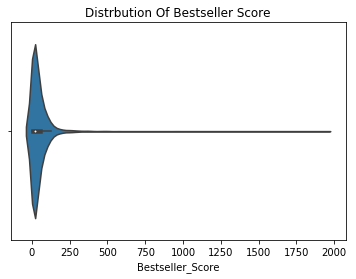

In [13]:
#plt.figure(figsize=(12,6))
viB = sb.violinplot(x='Bestseller_Score',data=best_book)
plt.title("Distrbution Of Bestseller Score")
viB

# Price

First up, I'll look at the price vs the best seller score. To start, I'll make a simple scatter plot of the two. then I'll fit a linear regression model to see if they're correlated. Finally I'll fit and graph a polynomial regression model to better show the trends in the data.

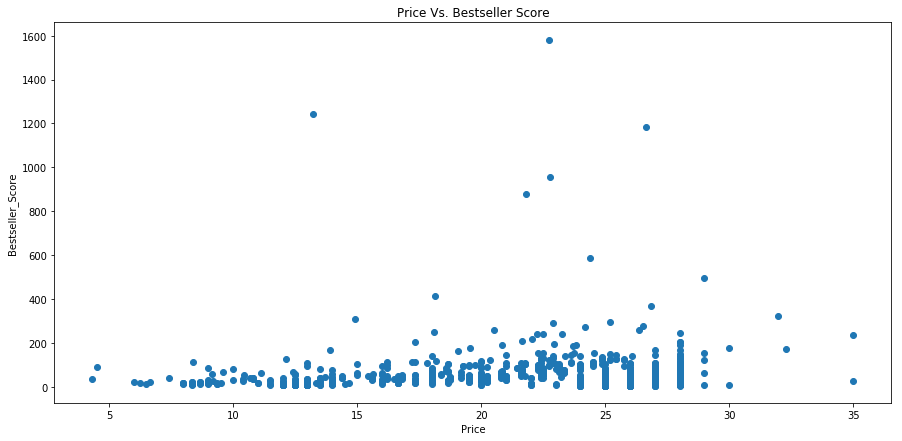

In [14]:
#drop the books that don't have a price
plt.figure(figsize=(15,7))
plt.scatter(best_book_price["Average_Price"],best_book_price['Bestseller_Score'])
plt.xlabel("Price")
plt.ylabel("Bestseller_Score")
plt.title("Price Vs. Bestseller Score")
plt.show()

In [15]:
import statsmodels.formula.api as statform
import numpy as np
reg = statform.ols(formula='Bestseller_Score ~ Average_Price', data=best_book_price).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.34
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           0.000463
Time:                        22:02:14   Log-Likelihood:                -6117.8
No. Observations:                1023   AIC:                         1.224e+04
Df Residuals:                    1021   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.3848     11.426      1.259      0.208      -8.037      36.806
Average_Price     1.8513      0.527      3.513      0.000       0.817       2.885
==============================================================================
Omnibus:                     1595.662   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           606335.674
Skew:                           9.407   Prob(JB):                         0.00
Kurtosis:                     120.775   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

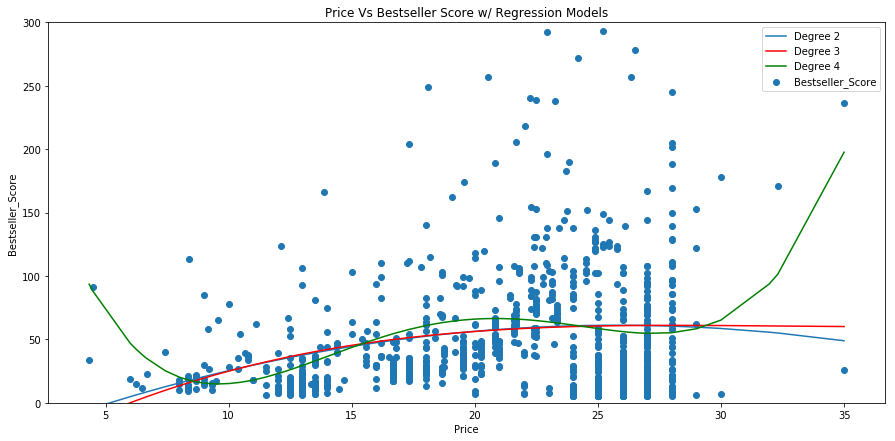

In [16]:
best_book_price = best_book_price.sort_values("Average_Price")
model_coef = np.polyfit(best_book_price["Average_Price"],best_book_price['Bestseller_Score'],2)
model_three = np.polyfit(best_book_price["Average_Price"],best_book_price['Bestseller_Score'],3)
model_four = np.polyfit(best_book_price["Average_Price"],best_book_price['Bestseller_Score'],4)
plt.figure(figsize=(15,7))
expected_deg2 = list(map(lambda x: model_coef[0]*(x**2)+model_coef[1]*x+model_coef[2],best_book_price["Average_Price"]))
expected_deg3 = list(map(lambda x: model_three[0]*(x**3)+model_three[1]*(x**2)+model_three[2]*x+model_three[3],best_book_price["Average_Price"]))
expected_deg4 = list(map(lambda x: model_four[0]*(x**4)+model_four[1]*(x**3)+model_four[2]*(x**2)+model_four[3]*x+model_four[4],best_book_price["Average_Price"]))

plt.plot(best_book_price["Average_Price"],expected_deg2,label="Degree 2")
plt.plot(best_book_price["Average_Price"],expected_deg3,label="Degree 3",color="r")
plt.plot(best_book_price["Average_Price"],expected_deg4,label="Degree 4",color="g")
plt.scatter(best_book_price["Average_Price"],best_book_price['Bestseller_Score'])
plt.xlabel("Price")
plt.ylabel("Bestseller_Score")
plt.ylim((0,300))
plt.title("Price Vs Bestseller Score w/ Regression Models")
plt.legend()
plt.show()

As you can see in the analysis above, the p value of the linear regression model is less than 0.05 and even smaller than 0.01 so the two variables are correlated. Also from the various degree model you can see that the BSS has a little peak around 20 dollars. The 4th degree model also shows a climb back up around 30 dollars, although a thought about this occurred to me when I was analyzing this.

BSS and price's relationship may not be one way. For the higher priced books with higher scores it might not be that they're on the bestsellers list because of their price, but rather people are buying them at that high price because they are on the bestsellers list. This is something I might want to do a follow up on, which I will discuss more about in my conclusion.

# Genre

Next up I'll look at how genre affects bestseller score. To do this I'll first organize them so that each book has an entry for each of its genres (to make it easier to group the data by genre.) Then I'll fit a linear regression model to see if the genre affects the bestseller score. I'll also look at the count of books for each genre and their average bestsellers score. Finally I'll use a violin graph to look at the distribution of the bestseller scores for each genre.

In [17]:
#add the genres into the main data set
genre_list = list()
combo_list = list()
for curr_book in author_match_df.iterrows():
    gr_id = curr_book[1]['goodread_book_id']
    #look the book up by it's id
    book_genre_row = genre_seller[genre_seller['GoodReads_ID']==gr_id]
    #save the primary genre
    book_genre = book_genre_row['Primary_Genre'].unique()[0]
    #if the book has a secodary genre then save that too
    if (("None" not in book_genre_row['Secondary_Genre'].unique()[0]) and ("Other" not in book_genre_row['Secondary_Genre'].unique()[0])):
        sec_genre = "/" + book_genre_row['Secondary_Genre'].unique()[0] 
        book_genre = book_genre + sec_genre
    #to make it a little easier use one genre for each combo (Ex: Rom/Fan = Fan/Rom)
    words = book_genre.split('/')
    rev = book_genre
    if len(words) == 2:
        rev = words[1] + '/n' + "/" + words[0]
    if (book_genre not in combo_list):
        #if the combo isn't in the combo list AND the rev isn't then add it
        if (rev not in combo_list):
            combo_list.append(book_genre)
        #if the combo isn't in the combo list BUT the rev is then flip it
        else:
            book_genre = rev
    genre_list.append(book_genre)
author_match_df['Genre'] = genre_list
#drop one book that couldn't be sorted
author_match_df = author_match_df[author_match_df['Genre']!="Fantasy/SciFi/Mystery/Romance/Realistic/Thriller/Comedy/Drama"]
genre_list = list()
score_list = list()
price_list = list()
for curr_row in author_match_df.iterrows():
    curr_book = curr_row[1]
    curr_price = curr_book['Average_Price']
    curr_score = curr_book['Bestseller_Score']
    for word in curr_book['Genre'].split("/"):
        genre_list.append(word)
        score_list.append(curr_score)
        price_list.append(curr_price)
genre_graph_df = pd.DataFrame({'Bestseller_Score':score_list,'Genre':genre_list,'Price':price_list})

In [18]:
reg2 = statform.ols(formula='Bestseller_Score ~ Genre', data=genre_graph_df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.171
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0343
Time:                        22:02:24   Log-Likelihood:                -7687.3
No. Observations:                1223   AIC:                         1.539e+04
Df Residuals:                    1215   BIC:                         1.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             46.8000     26.063      1.796      0.073      -4.334      97.934
Genre[T.Drama]        40.0889     40.283      0.995      0.320     -38.944     119.122
Genre[T.Fantasy]      11.4418     28.112      0.407      0.684     -43.712      66.595
Genre[T.Mystery]      42.9542     27.124      1.584      0.114     -10.261      96.169
Genre[T.Realistic]    39.3416     27.426      1.434      0.152     -14.466      93.149
Genre[T.Romance]      28.6167     27.935      1.024      0.306     -26.190      83.423
Genre[T.SciFi]         1.0621     31.178      0.034      0.973     -60.107      62.232
Genre[T.Thriller]     48.0165     27.256      1.762      0.078      -5.458     101.491
==============================================================================
Omnibus:                     1530.333   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180880.827
Skew:                           6.624   Prob(JB):                         0.00
Kurtosis:                      61.087   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   Count      Genre
1     18      Drama
0     25     Comedy
6     58      SciFi
2    153    Fantasy
5    168    Romance
4    233  Realistic
7    267   Thriller
3    301    Mystery


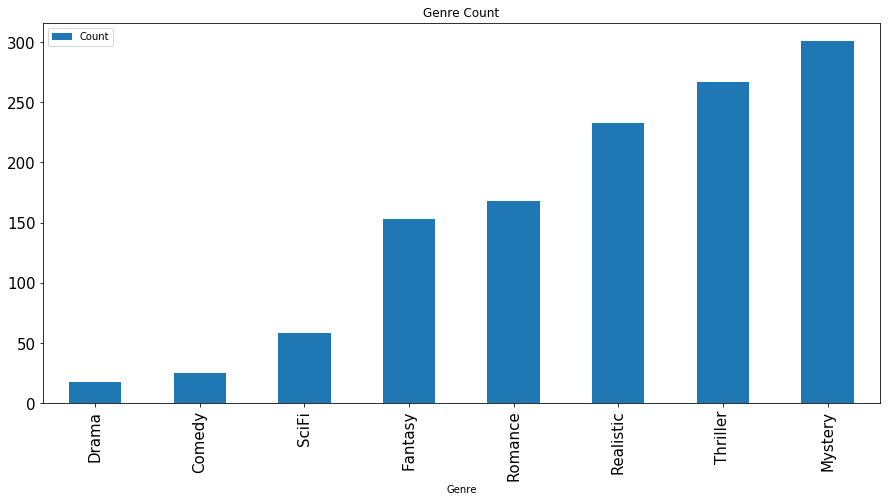

In [19]:
genre_list = list()
count_list = list()
for curr_genre in genre_graph_df.groupby("Genre"):
    count = len(curr_genre[1])
    count_list.append(count)
    genre_list.append(curr_genre[0])
count_graph_df = pd.DataFrame({'Count':count_list,'Genre':genre_list})
count_graph_df = count_graph_df.sort_values('Count')
print(count_graph_df)
count_hist = count_graph_df.plot.bar(x='Genre',y='Count',figsize=(15,7),fontsize=15,title="Genre Count")
count_hist

   Avg_Bestseller_Score      Genre
0             46.800000     Comedy
6             47.862069      SciFi
2             58.241830    Fantasy
5             75.416667    Romance
4             86.141631  Realistic
1             86.888889      Drama
3             89.754153    Mystery
7             94.816479   Thriller


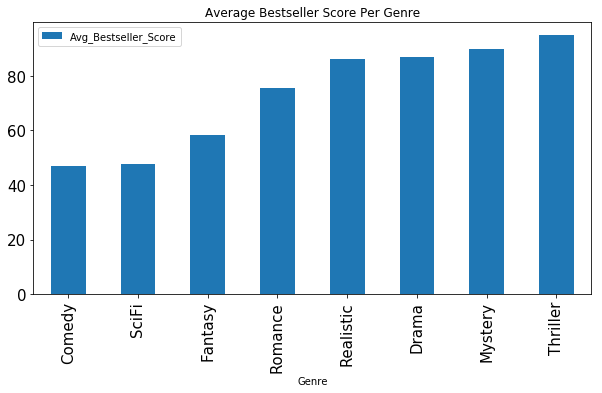

In [20]:
genre_list = list()
avg_bs_list = list()

for curr_genre in genre_graph_df.groupby("Genre"):
    avg_bs = sum(curr_genre[1]['Bestseller_Score'])/(len(curr_genre[1]['Bestseller_Score']))
    avg_bs_list.append(avg_bs)
    genre_list.append(curr_genre[0])
avg_genre_graph_df = pd.DataFrame({'Avg_Bestseller_Score':avg_bs_list,'Genre':genre_list})
avg_genre_graph_df = avg_genre_graph_df.sort_values('Avg_Bestseller_Score')
print(avg_genre_graph_df)
avg_hist = avg_genre_graph_df.plot.bar(x='Genre',y='Avg_Bestseller_Score',figsize=(10,5),fontsize=15, title = "Average Bestseller Score Per Genre")
avg_hist

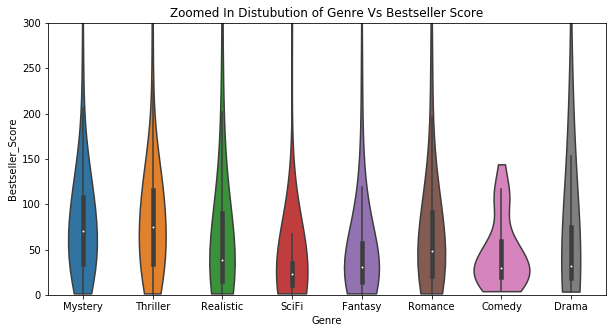

In [21]:
plt.figure(figsize=(10,5))
vi3 = sb.violinplot(x='Genre',y='Bestseller_Score',data=genre_graph_df, cut=0)
#since the majority of books have a BSS of less than 250, I'll zoom in on that part
#HOWEVER this ignores some of the extreme values which shifts the exact averages around, so the histogram is more
#acurate for exact averages and this graph is more for distructions
plt.ylim(0,300)
plt.title("Zoomed In Distubution of Genre Vs Bestseller Score")
vi3

As you can see from the analysis above the p value is greater than 0.05 which means that the genre and the bestseller score are correlated. Looking at the count and average book scores it looks like mystery and thriller novels are the most popular both in the count and the bestseller score. Surprisingly drama was relatively  low in the book count, in the top three of the bestseller score.

# Genre & Price

Finally I'll look at how genre affects how price affects bestseller score. This one will be shorter for a reason you'll see in a moment.

In [22]:
genre_graph_df = genre_graph_df[genre_graph_df['Price']!=0]
reg3 = statform.ols(formula='Bestseller_Score ~ Price * Genre', data=genre_graph_df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Bestseller_Score   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8947
Date:                Fri, 19 Jul 2019   Prob (F-statistic):              0.570
Time:                        22:02:27   Log-Likelihood:                -4312.9
No. Observations:                 682   AIC:                             8658.
Df Residuals:                     666   BIC:                             8730.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -35.5556    109.151     -0.326      0.745    -249.878     178.766
Genre[T.Drama]             -16.6500    157.151     -0.106      0.916    -325.220     291.920
Genre[T.Fantasy]            69.6470    125.648      0.554      0.580    -177.066     316.360
Genre[T.Mystery]            71.7229    119.713      0.599      0.549    -163.338     306.783
Genre[T.Realistic]          36.6696    117.974      0.311      0.756    -194.977     268.316
Genre[T.Romance]            70.3637    124.862      0.564      0.573    -174.806     315.534
Genre[T.SciFi]              39.6365    136.763      0.290      0.772    -228.902     308.175
Genre[T.Thriller]           72.9771    120.141      0.607      0.544    -162.924     308.878
Price                        5.0792      6.137      0.828      0.408      -6.971      17.129
Price:Genre[T.Drama]         2.8766      8.302      0.347      0.729     -13.424      19.177
Price:Genre[T.Fantasy]      -3.1220      6.807     -0.459      0.647     -16.487      10.243
Price:Genre[T.Mystery]      -2.8604      6.498     -0.440      0.660     -15.619       9.898
Price:Genre[T.Realistic]    -0.7613      6.494     -0.117      0.907     -13.512      11.989
Price:Genre[T.Romance]      -2.4743      6.743     -0.367      0.714     -15.714      10.765
Price:Genre[T.SciFi]        -1.6421      7.185     -0.229      0.819     -15.749      12.465
Price:Genre[T.Thriller]     -2.7377      6.514     -0.420      0.674     -15.527      10.052
==============================================================================
Omnibus:                      916.867   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122344.663
Skew:                           7.149   Prob(JB):                         0.00
Kurtosis:                      67.039   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see, this p value is not smaller that 0.05 therefore the different between the prices and the prices based on genres is not statistically significant.

# Conclusion

In summary, using these datasets, we found that the price of a book affects where is ranks in the New York Times Bestsellers and/or how long it's on the list. We also found that the genre also affects it. Mystery, Thriller, and Realistic books are the more popular count wise, while Thriller, Mystery, and Drama were the highest rank wise.

As I mentioned in my price analysis, as I was working I started to think that the relationship between bestseller rank and price may not just be one way. People may be willing to pay more for a book because it is on the bestseller list. Therefore, as I follow up, I think it would be interesting compare non bestsellers prices to bestsellers. Or even compare the price of a bestseller before it is on the list, while it is on the list, and after it falls off the list.